In [39]:
import generated.tracking_data_pb2 as tracking_data_pb2

file_path = '/tmp/ros/proto/traj_tracking/tracking_data_37_256'
tracking_data = tracking_data_pb2.TrackingData()

with open(file_path, 'rb') as f:
  tracking_data.ParseFromString(f.read())

In [42]:
timestamps = tracking_data.timestamp

# reference data
refer_data = {
    "x_seq": [],
    "y_seq": [],
    "theta_seq": [],
    "v_seq": [],
    "omega_seq": [],
    "kappa_seq": []
}
for item in tracking_data.reference_data:
    refer_data["x_seq"].append(item.x)
    refer_data["y_seq"].append(item.y)
    refer_data["theta_seq"].append(item.theta)
    refer_data["v_seq"].append(item.v)
    refer_data["omega_seq"].append(item.omega)
    refer_data["kappa_seq"].append(item.kappa)
# actual data
actual_data = {
    "x_seq": [],
    "y_seq": [],
    "theta_seq": [],
    "v_seq": [],
    "omega_seq": [],
    "kappa_seq": []
}
for item in tracking_data.actual_data:
    actual_data["x_seq"].append(item.x)
    actual_data["y_seq"].append(item.y)
    actual_data["theta_seq"].append(item.theta)
    actual_data["v_seq"].append(item.v)
    actual_data["omega_seq"].append(item.omega)
    actual_data["kappa_seq"].append(item.kappa)
# control data
control_data = {
    "v_seq": [],
    "omega_seq": [],
    "kappa_seq": []
}
for item in tracking_data.control_signal:
    control_data["v_seq"].append(item.v)

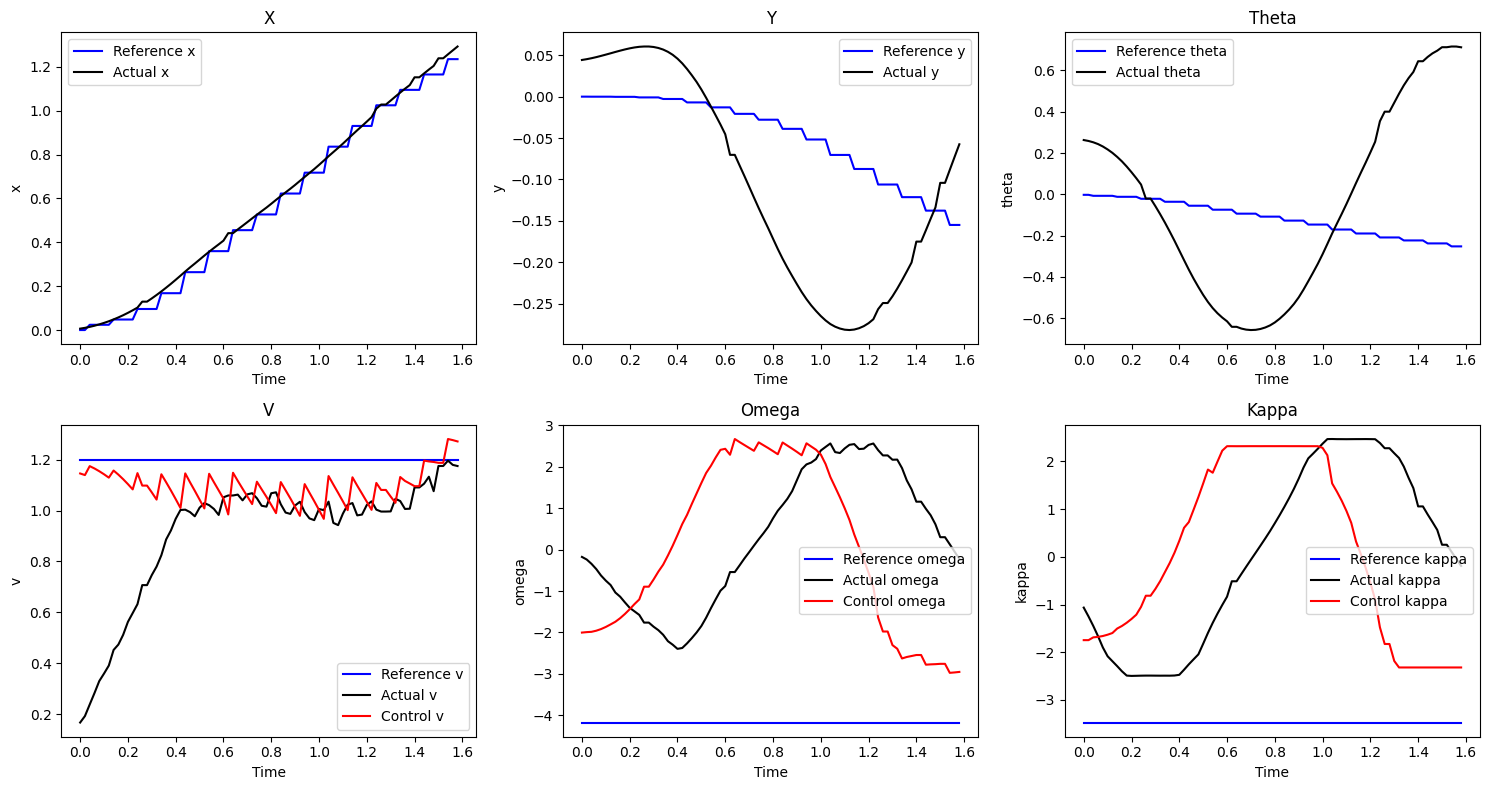

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# matplot
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
interval = 0.02
x_ticks = np.arange(0, len(timestamps) * interval, interval) # axis-x

axs[0,0].plot(x_ticks, refer_data["x_seq"], label="Reference x", color="blue")
axs[0,0].plot(x_ticks, actual_data["x_seq"], label="Actual x", color="black")
axs[0,0].set_title('X')
axs[0,0].set_xlabel('Time')
axs[0,0].set_ylabel('x')
axs[0,0].legend()

axs[0,1].plot(x_ticks, refer_data["y_seq"], label="Reference y", color="blue")
axs[0,1].plot(x_ticks, actual_data["y_seq"], label="Actual y", color="black")
axs[0,1].set_title('Y')
axs[0,1].set_xlabel('Time')
axs[0,1].set_ylabel('y')
axs[0,1].legend()

axs[0,2].plot(x_ticks, refer_data["theta_seq"], label="Reference theta", color="blue")
axs[0,2].plot(x_ticks, actual_data["theta_seq"], label="Actual theta", color="black")
axs[0,2].set_title('Theta')
axs[0,2].set_xlabel('Time')
axs[0,2].set_ylabel('theta')
axs[0,2].legend()

axs[1,0].plot(x_ticks, refer_data["v_seq"], label="Reference v", color="blue")
axs[1,0].plot(x_ticks, actual_data["v_seq"], label="Actual v", color="black")
axs[1,0].plot(x_ticks, control_data["v_seq"], label="Control v", color="red")
axs[1,0].set_title('V')
axs[1,0].set_xlabel('Time')
axs[1,0].set_ylabel('v')
axs[1,0].legend()

axs[1,1].plot(x_ticks, refer_data["omega_seq"], label="Reference omega", color="blue")
axs[1,1].plot(x_ticks, actual_data["omega_seq"], label="Actual omega", color="black")
axs[1,1].plot(x_ticks, control_data["omega_seq"], label="Control omega", color="red")
axs[1,1].set_title('Omega')
axs[1,1].set_xlabel('Time')
axs[1,1].set_ylabel('omega')
axs[1,1].legend()

axs[1,2].plot(x_ticks, refer_data["kappa_seq"], label="Reference kappa", color="blue")
axs[1,2].plot(x_ticks, actual_data["kappa_seq"], label="Actual kappa", color="black")
axs[1,2].plot(x_ticks, control_data["kappa_seq"], label="Control kappa", color="red")
axs[1,2].set_title('Kappa')
axs[1,2].set_xlabel('Time')
axs[1,2].set_ylabel('kappa')
axs[1,2].legend()

plt.tight_layout()
plt.show()